**Name:** Sarah Sexton-Bowser <br/>
**Semester:** Spring 2020 <br/>
**Project area:** Analysis of state level data for crop yield and environmental conditions. </br>
**Objective**: To study the yield response of sorghum and corn to precipitation and drought in the NW and SW Kansas crop districts. 

In [118]:
#Import Modules
import pandas as pd
import numpy as np 
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

**Data Sources:** 
1. Data for yield of sorghum and corn is obtained by USDA Quick Stats from USDA NASS. https://quickstats.nass.usda.gov/ 
2. Data for weather variables is obtained by NOAA. https://www7.ncdc.noaa.gov/CDO/CDODivisionalSelect.jsp  

The raw data has availability of data for the years of 1949 to 2018. The processed data restricts time periods to years with availability of all data variables of interest. Data with classification of excess or deficit moisture includes only years meeting the criteria of two or more summer months as excess or deficit moisture.  

Data for corn in NW and SW Kansas starts in 1974. 

**Load dataset previously processed. Reference the repository file processed data/code for code utilized in processing, and method for designating excess or deficit moisture years.**  

In [119]:
NW = pd.read_csv('NWdf.csv') #NW district entire data set
NWDF = pd.read_csv('NWDFdf.csv') #NW district data set for years of two or more summer months of deficit moisture
NWW = pd.read_csv('NWWdf.csv') #NW district data set for years of two or more summer months of excess moisture 

SW = pd.read_csv('SWdf.csv') #SW district entire data set
SWDF = pd.read_csv('SWDFdf.csv') #SW district data set for years of two or more summer months of deficit moisture
SWW = pd.read_csv('SWWdf.csv') #SW district data set for years of two or more summer months of excess moisture 

In [120]:
NWW.head(5)

,Year,Sor_Yield,Corn_Yield,PCP1,PDSI1,PCP2,PDSI2,PCP3,PDSI3,PCP4,...,PDSI9,PCP10,PDSI10,PCP11,PDSI11,PCP12,PDSI12,PCP,DCount,WCount
0,2018,91.6,106.5,0.63,-0.55,0.42,-0.53,0.59,-1.03,1.09,...,0.11,3.31,1.53,0.59,1.43,1.63,2.34,24.61,0,4
1,2017,81.5,107.8,1.03,0.46,0.05,-0.57,2.11,0.06,2.25,...,2.17,1.78,2.40,0.10,-0.54,0.09,-0.78,24.55,0,4
2,2016,91.9,103.4,0.12,-0.25,0.87,-0.06,0.39,-0.84,5.59,...,1.69,0.05,-0.79,0.33,-1.25,0.47,-0.01,21.07,0,4
3,2011,76.3,78.0,0.37,-0.72,0.50,-0.61,0.67,-0.95,2.07,...,0.64,3.05,1.71,0.45,1.42,0.61,1.44,22.93,1,3
4,2010,81.0,83.4,0.12,4.84,0.41,4.53,2.02,4.70,3.36,...,4.71,0.32,-0.48,0.37,-0.66,0.24,-0.75,19.60,0,4


# Analyze the Data
The data is tested for linear relationships for each corn and sorghum yield, and all independent variables which are primarily precipitation. This is done for each crop district for each moisture classification, excess moisture or deficit moisture in two or more months of the summer season.
1. Run a for loop to test statistical significance of each independent variables (precipitation, drought, year, etc) for dependent variables of sorghum and corn yield. This is done for each data set: NW deficit moisture, NW excess moisture, SW deficit moisture, SW excess moisture. 
2. Use stats module to do a simple linear regression with for each possible independent variable in the data set as a single explanatory variable.  
3. Return results as a dictionary.

The linear model is:

$y=a + bx$ <br/>
$y$ is the dependent variable of Sorghum Yield or Corn Yield in this analysis.<br/>
$a$ in the intercept.<br/>
$b$ is the slope.<br/>
$x$ is the independent variable, primarily precipitation variables in this analysis. <br/>

**Analysis of Northwest Kansas with seperate analysis for years of summer excess moisture and deficit moisture, and corn and sorghum yield.**

In [121]:
# Corn and Sorghum yield response in NW Kansas during years of two or more summer months with classification of Palmer Drought Score Index (PDSI) as deficit moisture

D = [] # append variables for linear statistics 
D_key = [] # append Y variable 
keys = []  # append X variable
NWDD = defaultdict(dict) #NW drought dictionary

for column1 in NWDF[['Sor_Yield','Corn_Yield']]: 
    for column in NWDF:
        slope, intercept, r_value, p_value, std_err = stats.linregress((NWDF[column]),(NWDF[column1]))
        r_squared = r_value**2
        y_pred = intercept + slope * NWDF[column] 
        variables = {'slope':slope, 'intercept':intercept, 'r_value':r_value, 'p_value':p_value, 'std_err':std_err, 'r_squared':r_squared, 'y_pred':y_pred} 
        D.append(variables)
        D_key.append(column)
        keys.append(column1)
        for column1, column, variables in zip(keys, D_key, D):
            NWDD[column1][column] = variables

# Corn and Sorghum yield response in NW Kansas during years of two or more summer months with classification of Palmer Drought Score Index (PDSI) as excess moisture

D = [] # append variables for linear statistics 
D_key = [] # append Y variable 
keys = []  # append X variable
NWWD = defaultdict(dict) #NW wet year dictionary

for column1 in NWW[['Sor_Yield','Corn_Yield']]: 
    for column in NWW:
        slope, intercept, r_value, p_value, std_err = stats.linregress((NWW[column]),(NWW[column1]))
        r_squared = r_value**2
        y_pred = intercept + slope * NWW[column] 
        variables = {'slope':slope, 'intercept':intercept, 'r_value':r_value, 'p_value':p_value, 'std_err':std_err, 'r_squared':r_squared, 'y_pred':y_pred} 
        D.append(variables)
        D_key.append(column)
        keys.append(column1)
        for column1, column, variables in zip(keys, D_key, D):
            NWWD[column1][column] = variables

**Analysis of Southwest Kansas with seperate analysis for years of summer excess moisture and deficit moisture, and corn and sorghum yield.**

In [122]:
# Corn and Sorghum yield response in SW Kansas during years of two or more summer months with classification of Palmer Drought Score Index (PDSI) as deficit moist

D = [] # append variables for linear statistics 
D_key = [] # append Y variable 
keys = []  # append X variable
SWDD = defaultdict(dict) #SW drought dictionary

for column1 in SWDF[['Sor_Yield','Corn_Yield']]: 
    for column in SWDF:
        slope, intercept, r_value, p_value, std_err = stats.linregress((SWDF[column]),(SWDF[column1]))
        r_squared = r_value**2
        y_pred = intercept + slope * SWDF[column] 
        variables = {'slope':slope, 'intercept':intercept, 'r_value':r_value, 'p_value':p_value, 'std_err':std_err, 'r_squared':r_squared, 'y_pred':y_pred} 
        D.append(variables)
        D_key.append(column)
        keys.append(column1)
        for column1, column, variables in zip(keys, D_key, D):
            SWDD[column1][column] = variables

# Corn and Sorghum yield response in NW Kansas during years of two or more summer months with classification of Palmer Drought Score Index (PDSI) as excess moisture            
D = [] # append variables for linear statistics 
D_key = [] # append Y variable 
keys = []  # append X variable
SWWD = defaultdict(dict) #SW wet year dictionary

for column1 in SWW[['Sor_Yield','Corn_Yield']]: 
    for column in SWW:
        slope, intercept, r_value, p_value, std_err = stats.linregress((SWW[column]),(SWW[column1]))
        r_squared = r_value**2
        y_pred = intercept + slope * SWW[column] 
        variables = {'slope':slope, 'intercept':intercept, 'r_value':r_value, 'p_value':p_value, 'std_err':std_err, 'r_squared':r_squared, 'y_pred':y_pred} 
        D.append(variables)
        D_key.append(column)
        keys.append(column1)
        for column1, column, variables in zip(keys, D_key, D):
            SWWD [column1][column] = variables

**Let's look at a few of the results.**

In [123]:
print('NW Kansas in Moisture Deficit Summers')
print('Sorghum yield in response to annual precipitation: p value', NWDD['Sor_Yield']['PCP']['p_value'],',r squared', NWDD['Sor_Yield']['PCP']['r_squared'],'slope', NWDD['Sor_Yield']['PCP']['slope'])
print('Corn yield in response to annual precipitation: p value', NWDD['Corn_Yield']['PCP']['p_value'],',r squared', NWDD['Corn_Yield']['PCP']['r_squared'],'slope', NWDD['Corn_Yield']['PCP']['slope'])
print('     ')
print('Sorghum yield in response to July precipitation: p value', NWDD['Sor_Yield']['PCP7']['p_value'],',r squared', NWDD['Sor_Yield']['PCP7']['r_squared'],'slope', NWDD['Sor_Yield']['PCP7']['slope'])
print('Corn yield in response to July precipitation: p value', NWDD['Corn_Yield']['PCP7']['p_value'],',r squared', NWDD['Corn_Yield']['PCP7']['r_squared'],'slope', NWDD['Corn_Yield']['PCP7']['slope'])
print('     ')
print('     ')
print('SW Kansas in Moisture Deficit Summers')
print('Sorghum yield in response to annual precipitation: p value', SWDD['Sor_Yield']['PCP']['p_value'],',r squared', SWDD['Sor_Yield']['PCP']['r_squared'],'slope', SWDD['Sor_Yield']['PCP']['slope'])
print('Corn yield in response to annual precipitation: p value', SWDD['Corn_Yield']['PCP']['p_value'],',r squared', SWDD['Corn_Yield']['PCP']['r_squared'],'slope', SWDD['Corn_Yield']['PCP']['slope'])
print('     ')
print('     ')
print('NW Kansas in Moisture Excess Summers')
print('Sorghum yield in response to August precipitation: p value', NWWD['Sor_Yield']['PCP8']['p_value'],',r squared', NWWD['Sor_Yield']['PCP8']['r_squared'],'slope', NWWD['Sor_Yield']['PCP8']['slope'])
print('Corn yield in response to August precipitation: p value', NWWD['Corn_Yield']['PCP8']['p_value'],',r squared', NWWD['Corn_Yield']['PCP8']['r_squared'],'slope', NWWD['Corn_Yield']['PCP8']['slope'])
print('     ')
print('     ')
print('SW Kansas in Moisture Excess Summers')
print('Sorghum yield in response to annual precipitation: p value', SWWD['Sor_Yield']['PCP']['p_value'],',r squared', SWWD['Sor_Yield']['PCP']['r_squared'],'slope', SWWD['Sor_Yield']['PCP']['slope'])
print('Corn yield in response to annual precipitation: p value', SWWD['Corn_Yield']['PCP']['p_value'],',r squared', SWWD['Corn_Yield']['PCP']['r_squared'],'slope', SWWD['Corn_Yield']['PCP']['slope'])

NW Kansas in Moisture Deficit Summers
Sorghum yield in response to annual precipitation: p value 7.368147401594467e-05 ,r squared 0.5715100788411828 slope 4.593458639086202
Corn yield in response to annual precipitation: p value 0.0007739262994281689 ,r squared 0.4565970498517589 slope 5.1100179983127925
     
Sorghum yield in response to July precipitation: p value 0.0002689232294918486 ,r squared 0.5113834821253208 slope 9.811130040243958
Corn yield in response to July precipitation: p value 0.00026184804004160227 ,r squared 0.5126973228857643 slope 12.226558349391693
     
     
SW Kansas in Moisture Deficit Summers
Sorghum yield in response to annual precipitation: p value 0.0044453392162175035 ,r squared 0.40612632323520226 slope 3.3147534621558674
Corn yield in response to annual precipitation: p value 0.013616206258716233 ,r squared 0.32437008629043085 slope 1.645656461709973
     
     
NW Kansas in Moisture Excess Summers
Sorghum yield in response to August precipitation: p va

# Visualize the Data

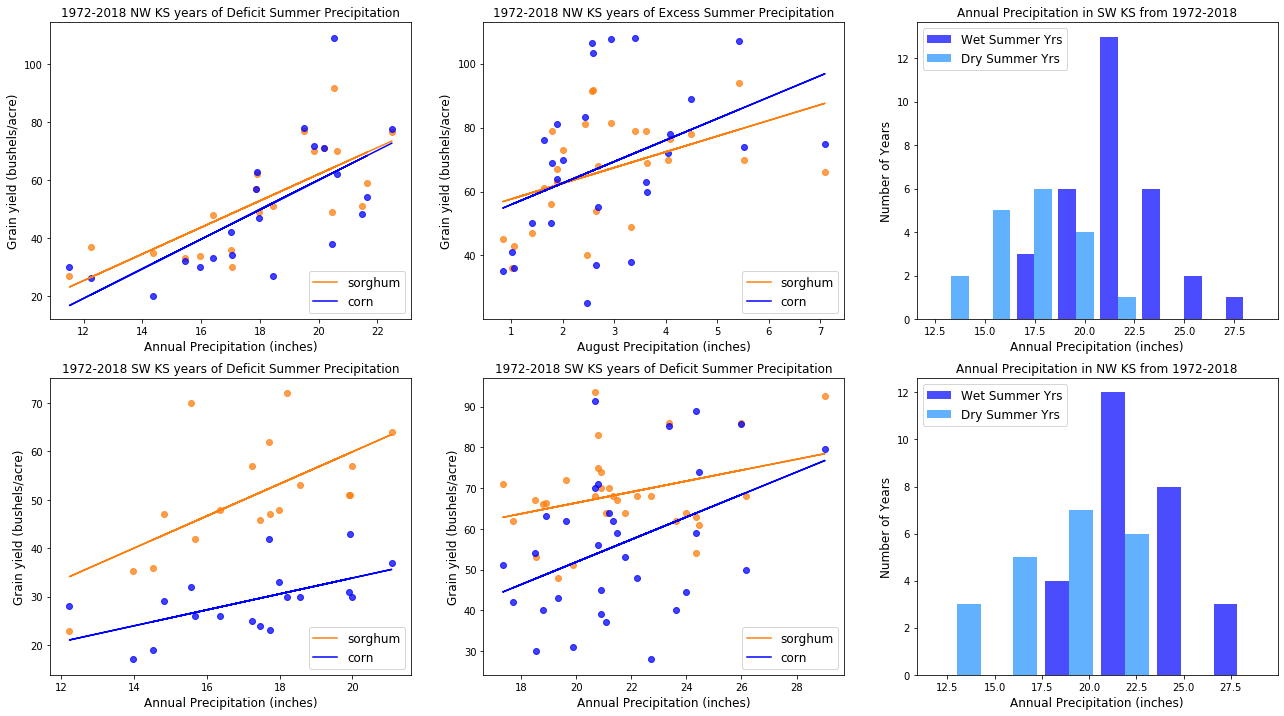

In [183]:
# Explore data

plt.figure(figsize=(22,12))

plt.subplot(2,3,1)
plt.title('1972-2018 NW KS years of Deficit Summer Precipitation')
plt.xlabel('Annual Precipitation (inches)', fontsize=12)
plt.ylabel('Grain yield (bushels/acre)', fontsize=12)
#Sorghum
plt.plot(NWDF["PCP"], NWDD["Sor_Yield"]['PCP']['y_pred'], 'C1', label='sorghum') # plot the linear predicted y line 
plt.scatter(NWDF["PCP"], NWDF["Sor_Yield"], facecolor='C1', alpha=0.75) # plot the actual data points as a scatter plot
#Corn 
plt.plot(NWDF["PCP"], NWDD["Corn_Yield"]['PCP']['y_pred'], '-b', label='corn') # plot the linear predicted y line 
plt.scatter(NWDF["PCP"], NWDF["Corn_Yield"], facecolor='b', alpha=0.75)  # plot the actual data points as a scatter plot
plt.legend(loc='lower right', fontsize=12)

plt.subplot(2,3,2)
plt.title('1972-2018 NW KS years of Excess Summer Precipitation')  
plt.xlabel('August Precipitation (inches)', fontsize=12 )
plt.ylabel('Grain yield (bushels/acre)', fontsize=12)
#Sorghum
plt.plot(NWW["PCP8"], NWWD["Sor_Yield"]['PCP8']['y_pred'], 'C1', label='sorghum') # plot the linear predicted y line 
plt.scatter(NWW["PCP8"], NWW["Sor_Yield"], facecolor='C1', alpha=0.75)  # plot the actual data points as a scatter plot
#Corn 
plt.plot(NWW["PCP8"], NWWD["Corn_Yield"]['PCP8']['y_pred'], '-b', label='corn') # plot the linear predicted y line 
plt.scatter(NWW["PCP8"], NWW["Corn_Yield"], facecolor='b', alpha=0.75)  # plot the actual data points as a scatter plot
plt.legend(loc='lower right', fontsize =12)

plt.subplot(2,3,3)
plt.title('Annual Precipitation in SW KS from 1972-2018')  
plt.xlabel('Annual Precipitation (inches)', fontsize=12)
plt.ylabel('Number of Years', fontsize =12)
N = 8 #number of bins for precipitation 
colors = ['b', 'dodgerblue']
x_pcp_SW_wet_dry  = [SWW.PCP, SWDF.PCP] # the two variables of rainfall years 
label = 'Wet Summer Yrs','Dry Summer Yrs'
n, bins, patches = plt.hist(x=x_pcp_SW_wet_dry, bins=N, color = colors, label = label, #plot histogram of two distributions of year sets (wet and dry) 
                            alpha=0.7, rwidth=0.85)
plt.legend(loc='upper left', fontsize =12)

plt.subplot(2,3,4)
plt.title('1972-2018 SW KS years of Deficit Summer Precipitation') 
plt.ylabel('Grain yield (bushels/acre)', fontsize =12)
plt.xlabel('Annual Precipitation (inches)', fontsize =12)
#Sorghum 
plt.plot(SWDF["PCP"], SWDD["Sor_Yield"]['PCP']['y_pred'], 'C1', label='sorghum') # plot the linear predicted y line 
plt.scatter(SWDF["PCP"], SWDF["Sor_Yield"], facecolor='C1', alpha=0.75)  # plot the actual data points as a scatter plot
#Corn 
plt.plot(SWDF["PCP"], SWDD["Corn_Yield"]['PCP']['y_pred'], '-b', label='corn') # plot the linear predicted y line 
plt.scatter(SWDF["PCP"], SWDF["Corn_Yield"], facecolor='b', alpha=0.75)  # plot the actual data points as a scatter plot
plt.legend(loc='lower right', fontsize =12)

plt.subplot(2,3,5)
plt.title('1972-2018 SW KS years of Deficit Summer Precipitation')  
plt.xlabel('Annual Precipitation (inches)', fontsize =12)
plt.ylabel('Grain yield (bushels/acre)', fontsize =12)
#Sorghum
plt.plot(SWW["PCP"], SWWD["Sor_Yield"]['PCP']['y_pred'], 'C1', label='sorghum') # plot the linear predicted y line 
plt.scatter(SWW["PCP"], SWW["Sor_Yield"], facecolor='C1', alpha=0.75)  # plot the actual data points as a scatter plot
#Corn 
plt.plot(SWW["PCP"], SWWD["Corn_Yield"]['PCP']['y_pred'], '-b', label='corn') # plot the linear predicted y line 
plt.scatter(SWW["PCP"], SWW["Corn_Yield"], facecolor='b', alpha=0.75)  # plot the actual data points as a scatter plot
plt.legend(loc='lower right', fontsize =12)

plt.subplot(2,3,6)
plt.title('Annual Precipitation in NW KS from 1972-2018')
plt.xlabel('Annual Precipitation (inches)',fontsize =12)
plt.ylabel('Number of Years',fontsize =12)
N = 6  #number of bins for precipitation 
colors = ['b', 'dodgerblue']
x_pcp_NW_wet_dry = [NWW.PCP,NWDF.PCP]
label = 'Wet Summer Yrs','Dry Summer Yrs'
n, bins, patches = plt.hist(x=x_pcp_NW_wet_dry, bins=N, color = colors, label = label, #plot histogram of two distributions of year sets (wet and dry) 
                            alpha=0.7, rwidth=0.85)
plt.legend(loc='upper left', fontsize =12)

#plt.savefig('SW_NW_pcp_yields.png', bbox_inches='tight', dpi=200, pad_inches = 0)
plt.show()

# Evaluate the efficiency of yield production given precipitation in years of deficit summer moisture.  
A Frontier Efficiency analysis with the Douglas-Cobb function is used to assess the efficiency of yield productivity given a quantity of precipitation. This analysis is done for both dryland corn and sorghum in the Northwest and Southwest crop reporting districts for years of deficit water supply during the summer season. A quantile approach is undertook by dividing the variants of precipitation into six quantile groups. 

The Cobb-Douglas function is a production function developed by Douglas, a congressman and economist, and later revised by Cobb, a mathematician, at the request of Douglas (Douglas, 1967). The advantages of the Cobb-Douglas function is ability to analyze both marginal productivity and the scalar response of output given an additional unit of input. The Cobb-Douglas function is used to analyze productivity of yield, $y$, given a quantity precipitation, $x$. The model for estimations presented below is based on the log-linear Cobb-Douglas production function of $Y = K^\delta L^{\delta-1} Z^\lambda$. 

$y= a+ b ln(x)+ c [ln(x)]2 , x>0$ </br>

$y$ is productivity output of grain yield </br>
$x$ is the input of precipitation </br>
$a, b, c$ are estimated parameters </br>
The parameters are based on the hypothesis that the coefficients of $a$ and $b$ are not significantly different than 1, the coefficient of $c$ is not significantly different than 0. 

**Create quantile bins for both the NW and SW crop reporting districts**

In [172]:
N = 6 # Number of bins

# Southwest dry year rain bins 
SWDY_pcp_min = np.min(SWDF.PCP) #identify the minimum precipitation 
SWDY_pcp_max = np.max(SWDF.PCP) #identify the maximum precipitation 
SW_pcp_bins = np.linspace(SWDY_pcp_min, SWDY_pcp_max, N) #create 6 bins in the range of the min to the max 

# Northwest dry year rain bins 
NWDY_pcp_min = np.min(NWDF.PCP) #identify the minimum precipitation 
NWDY_pcp_max = np.max(NWDF.PCP) #identify the maximum precipitation
NW_pcp_bins = np.linspace(NWDY_pcp_min, NWDY_pcp_max, N) #create 6 bins in the range of the min to the max 

**Evaluate yields for each precipitation bin**
1. Create empty array for storing both 1) observed precipitations that fall within a precipitation bin and 2) yields that coorespond to each precipitation bin.
2. Identify the highest yield in each respective precipitation bin
3. Identify the cooresponding precipitation amount for each respective yield 

This is done for both the SW and NW districts for both corn and sorghum yields. 

In [162]:
# SW Deficit moisture years 
sw_corn_dry_frontier_yield_obs = np.array([]) # empty array to append yields 
sw_corn_dry_frontier_pcp_obs = np.array([]) # empty array to append precipitation 

sw_sor_dry_frontier_yield_obs = np.array([]) # empty array to append yields 
sw_sor_dry_frontier_pcp_obs = np.array([]) # empty array to append precipitation 

for n in range(len(SW_pcp_bins)-1):  
    idx = (SWDF.PCP >= SW_pcp_bins[n]) & (SWDF.PCP < SW_pcp_bins[n+1]) 
    
    if np.all(idx == False):
        continue
        
    else:
        pcp_bin = SWDF.loc[idx, 'PCP'] # loc precipitation to index for each bin 
        
        yield_bin = SWDF.loc[idx, 'Corn_Yield'] # loc yield to corresponding yield for each precipitation 
        max_yield_bin = np.amax(yield_bin) # identify max yield for each bin 
        idx_max_yield_bin = np.argmax(yield_bin.values) # identify precipitation the max yield in each precipitation bin 
        corresponding_pcp_bin = pcp_bin.iloc[idx_max_yield_bin] 
        
        s_yield_bin = SWDF.loc[idx, 'Sor_Yield']
        s_max_yield_bin = np.amax(s_yield_bin)
        s_idx_max_yield_bin = np.argmax(s_yield_bin.values)
        s_corresponding_pcp_bin = pcp_bin.iloc[s_idx_max_yield_bin]
        
        sw_corn_dry_frontier_pcp_obs = np.append(sw_corn_dry_frontier_pcp_obs, corresponding_pcp_bin) #append resulting precipitation data 
        sw_corn_dry_frontier_yield_obs = np.append(sw_corn_dry_frontier_yield_obs, max_yield_bin) #append resulting yield data 
        
        sw_sor_dry_frontier_pcp_obs = np.append(sw_sor_dry_frontier_pcp_obs, s_corresponding_pcp_bin)
        sw_sor_dry_frontier_yield_obs  = np.append(sw_sor_dry_frontier_yield_obs, s_max_yield_bin )
          

# NW deficit moisture years
nw_corn_dry_frontier_pcp_obs = np.array([]) 
nw_corn_dry_frontier_yield_obs = np.array([]) 

nw_sor_dry_frontier_pcp_obs = np.array([]) 
nw_sor_dry_frontier_yield_obs = np.array([])  

for n in range(len(NW_pcp_bins)-1): 
    idx = (NWDF.PCP >= NW_pcp_bins[n]) & (NWDF.PCP < NW_pcp_bins[n+1])
    
    if np.all(idx == False):
        continue
        
    else:
        pcp_bin = NWDF.loc[idx, 'PCP']
      
        yield_bin = NWDF.loc[idx, 'Corn_Yield'] 
        max_yield_bin = np.amax(yield_bin)
        idx_max_yield_bin = np.argmax(yield_bin.values)
        corresponding_pcp_bin = pcp_bin.iloc[idx_max_yield_bin]
        
        s_yield_bin = NWDF.loc[idx, 'Sor_Yield']
        s_max_yield_bin = np.amax(s_yield_bin)
        s_idx_max_yield_bin = np.argmax(s_yield_bin.values)
        s_corresponding_pcp_bin = pcp_bin.iloc[s_idx_max_yield_bin]
        
        nw_corn_dry_frontier_pcp_obs = np.append(nw_corn_dry_frontier_pcp_obs, corresponding_pcp_bin)
        nw_corn_dry_frontier_yield_obs = np.append(nw_corn_dry_frontier_yield_obs, max_yield_bin)
        
        nw_sor_dry_frontier_pcp_obs = np.append(nw_sor_dry_frontier_pcp_obs, s_corresponding_pcp_bin)
        nw_sor_dry_frontier_yield_obs = np.append(nw_sor_dry_frontier_yield_obs, s_max_yield_bin)

**Use Cobb-Douglas Model to estimate efficiency of yield response**
1. Use lamdba to define the Cobb Douglas model, including setting parameters.
2. Identify parameters for each set of observed max yields and cooresponding precipitation with the scipy.optimize curve_fit and Cobb-Douglas function. 
3. Use parameters to create a range of preciptation responses (y curve) in the range of precipitation from 0 to max precipitation.  

In [181]:
# Define Cobb-Douglas model 
np.seterr(divide = 'ignore', invalid='ignore'); # mute error codes 

cobb_douglas = lambda x, a, b, c: a + b * np.log(x) + c * np.log(x)**2 # define lambda function for cobb_douglas 
par0 = [1,1,0] # Define initial guess for the parameters of the Cobb-Douglas model
param_bounds=([-np.inf,0,-np.inf],[np.inf,1,np.inf]) # Fit Cobb-Douglas model

nw_dy_sy_par = curve_fit(cobb_douglas, nw_sor_dry_frontier_pcp_obs, nw_sor_dry_frontier_yield_obs, par0, bounds= param_bounds) #sorghum yield in nw for dry year
nw_dy_cy_par = curve_fit(cobb_douglas, nw_corn_dry_frontier_pcp_obs, nw_corn_dry_frontier_yield_obs, par0, bounds= param_bounds) #corn yield in nw for dry year

sw_dy_sy_par = curve_fit(cobb_douglas, sw_sor_dry_frontier_pcp_obs, sw_sor_dry_frontier_yield_obs, par0, bounds= param_bounds) #sorghum yield in sw for dry year
sw_dy_cy_par = curve_fit(cobb_douglas, sw_corn_dry_frontier_pcp_obs, sw_corn_dry_frontier_yield_obs, par0, bounds= param_bounds) #corn yield in sw for dry year

# Use parameters to create the y efficiency frontier line
nw_dy_frontier_pcp_line = np.arange(0, NWDY_pcp_max,1) # a range of x values from 0 to max observed 
nw_dy_cy_frontier_yield_line = cobb_douglas(nw_dy_frontier_pcp_line, *nw_dy_cy_par[0]) #frontier efficiency curve for dry year NW KS corn 
nw_dy_sy_frontier_yield_line = cobb_douglas(nw_dy_frontier_pcp_line, *nw_dy_sy_par[0]) #frontier efficiency curve for dry year NW KS sorghum 

sw_dy_frontier_pcp_line = np.arange(0, SWDY_pcp_max,1) # a range of x values from 0 to max observed 
sw_dy_cy_frontier_yield_line = cobb_douglas(sw_dy_frontier_pcp_line, *sw_dy_cy_par[0]) #frontier efficiency curve for dry year SW KS corn 
sw_dy_sy_frontier_yield_line = cobb_douglas(sw_dy_frontier_pcp_line, *sw_dy_sy_par[0]) #frontier efficiency curve for dry year SW KS sorghum 


# Visualize the Data

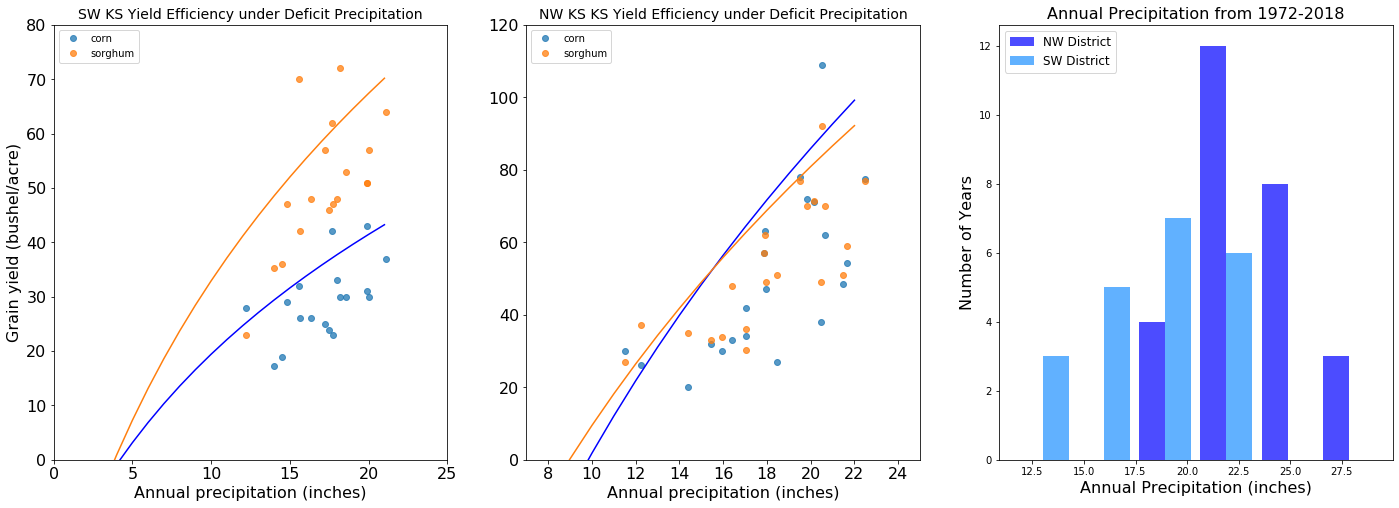

In [200]:
plt.figure(figsize=(24,8))

plt.subplot(1,3,1)
plt.title('SW KS Yield Efficiency under Deficit Precipitation', size=14)
# Corn
plt.plot(SWDF.PCP, SWDF.Corn_Yield, 'o', alpha=0.75, label='corn') #plot actual observed data 
plt.plot(sw_dy_frontier_pcp_line, sw_dy_cy_frontier_yield_line, 'b') # plot frontier curve 
# Sorghum
plt.plot(SWDF.PCP, SWDF.Sor_Yield, 'o', alpha=0.75, label='sorghum')
plt.plot(sw_dy_frontier_pcp_line, sw_dy_sy_frontier_yield_line, 'C1')
plt.legend(loc= "upper left")
plt.xlabel('Annual precipitation (inches)', size=16)
plt.ylabel('Grain yield (bushel/acre)', size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,25)
plt.ylim(0,80)

plt.subplot(1,3,2)
plt.title('NW KS KS Yield Efficiency under Deficit Precipitation', size=14)
# Corn
plt.plot(NWDF.PCP, NWDF.Corn_Yield, 'o', alpha=0.75, label='corn')
plt.plot(nw_dy_frontier_pcp_line, nw_dy_cy_frontier_yield_line, 'b')
# Sorghum
plt.plot(NWDF.PCP, NWDF.Sor_Yield, 'o', alpha=0.75, label='sorghum')
plt.plot(nw_dy_frontier_pcp_line, nw_dy_sy_frontier_yield_line, 'C1')
plt.legend(loc= "upper left")
plt.xlabel('Annual precipitation (inches)', size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(7,25)
plt.ylim(0,120)


plt.subplot(1,3,3)
plt.title('Annual Precipitation from 1972-2018', size=16)
plt.xlabel('Annual Precipitation (inches)',fontsize =16)
plt.ylabel('Number of Years',fontsize =16)
N = 6  #number of bins for precipitation 
colors = ['b', 'dodgerblue']
x_pcp = [NW.PCP,SW.PCP]
label = 'NW District','SW District'
n, bins, patches = plt.hist(x=x_pcp_NW_wet_dry, bins=N, color = colors, label = label, #plot histogram of precipitation for all years for each district 
                            alpha=0.7, rwidth=0.85)
plt.legend(loc='upper left', fontsize =12)

#plt.savefig('Frontier_Efficiency.png', bbox_inches='tight', dpi=200, pad_inches = 0)

plt.show()

**Source** <br/>
Cobb, C.W. and Douglas, P.H., 1928. A theory of production. The American Economic Review, 18(1), pp.139-165. <br/>
Douglas, P. H. (1967). Comments on the Cobb-Douglas production function. In The theory and empirical analysis of production (pp. 15-22). NBER. <br/>
Hayami, Y. (1970). On the use of the Cobb-Douglas production function on the cross-country analysis of agricultural production. American Journal of Agricultural Economics, 52(2), 327-329. <br/>
Jradi, S., Parmeter, C. F., & Ruggiero, J. (2019). Quantile estimation of the stochastic frontier model. Economics Letters, 182, 15-18.</br>
Patrignani, A., 2020. Pynotes. Copyright Andres Patrignani 2020 — Licensed under CC BY-NC-SA 
